In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm


In [2]:
data = pd.read_csv("/Users/aniketsingh/AirBnbSeniorProject/data/AB_NYC_2019.csv")


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

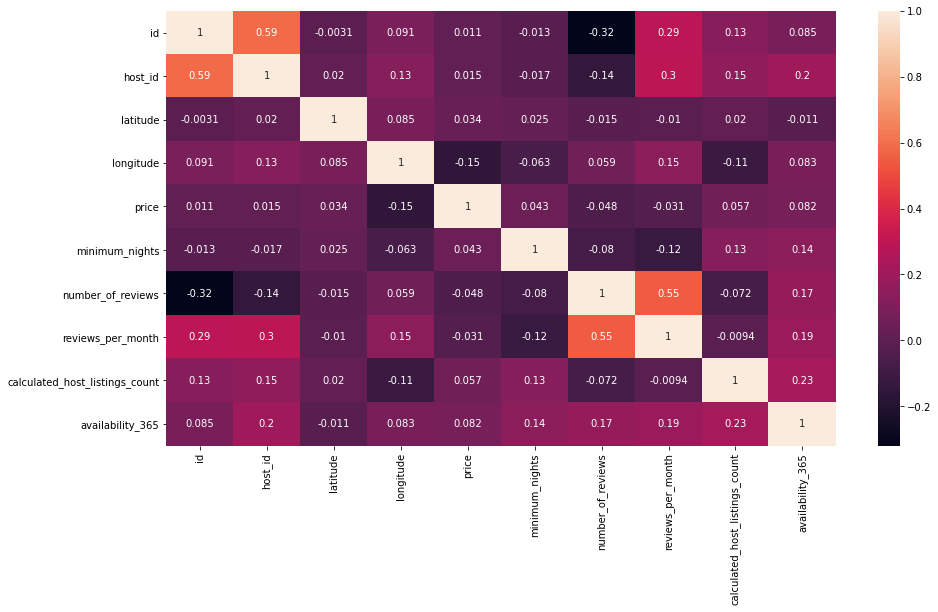

In [3]:
corr = data.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

In [4]:
#Checking for missing values
data.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
#imputing missing values
data.fillna({'reviews_per_month':0}, inplace=True)


In [6]:
#Rechecking if missing values are still remaining
data.isnull().sum()
#dropping these because not required for prediction
data = data.drop(columns = ["id","host_name", "name",'last_review',"latitude",'longitude', 'host_id'])


In [7]:
#As these are outliers detected in visualization of R
data  = data[data["price"]<1000]


In [8]:
#Checking if there's any row with price more than 1000
data[data["price"]>1000]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


/Users/aniketsingh/Library/r-miniconda/envs/r-reticulate/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aniketsingh/Library/r-miniconda/envs/r-reticulate/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

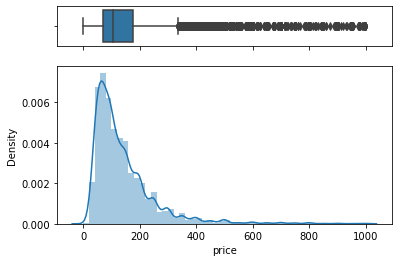

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
sns.boxplot(data["price"], ax=ax_box)
sns.distplot(data["price"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/Users/aniketsingh/Library/r-miniconda/envs/r-reticulate/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aniketsingh/Library/r-miniconda/envs/r-reticulate/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

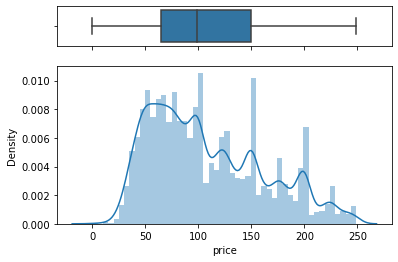

In [10]:
#hist_price2=dataset["price"][dataset["price"]<250].hist()
dataSet =data[data["price"]<250] 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
sns.boxplot(dataSet["price"], ax=ax_box)
sns.distplot(dataSet["price"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [11]:
#as we notice above we have a normal distrbution between 0-250, we would use only 0-250
data =data[data["price"]<250] 

In [12]:
#all the neighbourhood
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Prospect Heights', 'Washington Heights',
       'Upper East Side', 'Woodside', 'Carroll Gardens', 'Gowanus',
       'Flatlands', 'Cobble Hill', 'Flushing', 'Sunnyside', 'St. George',
       'Highbridge', 'Financial District', 'Morningside Heights',
       'Jamaica', 'Middle Village', 'Ridgewood', 'NoHo',
       'Ditmars Steinway', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria',
       'Clason Point', 'Eastchester', 'Kingsbridge', 'Boerum Hill',
     

In [13]:
data['neighbourhood'].value_counts()

Bedford-Stuyvesant    3560
Williamsburg          3451
Harlem                2487
Bushwick              2404
Upper West Side       1570
                      ... 
New Dorp                 1
Richmondtown             1
Willowbrook              1
Neponsit                 1
Rossville                1
Name: neighbourhood, Length: 219, dtype: int64

In [14]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
data.loc[(data.minimum_nights >10),"minimum_nights"]=10


/Users/aniketsingh/Library/r-miniconda/envs/r-reticulate/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aniketsingh/Library/r-miniconda/envs/r-reticulate/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

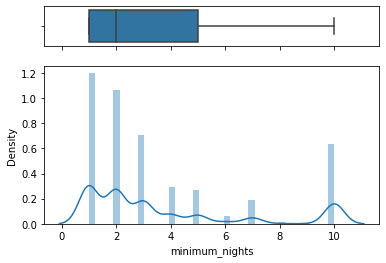

In [16]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
sns.boxplot(data["minimum_nights"], ax=ax_box)
sns.distplot(data["minimum_nights"], ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/Users/aniketsingh/Library/r-miniconda/envs/r-reticulate/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aniketsingh/Library/r-miniconda/envs/r-reticulate/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

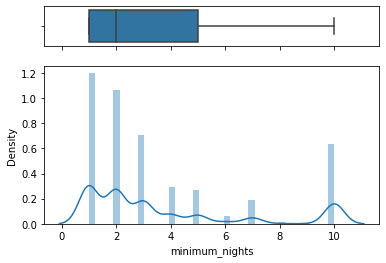

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
sns.boxplot(data["minimum_nights"], ax=ax_box)
sns.distplot(data["minimum_nights"], ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [18]:
#only using columns that I need for modelling 
#columnsInlcuded = ['price', 'room_type', 'minimum_nights', 'availability_365' ]
#columnsInlcuded = ['price', 'neighbourhood_group', 'room_type', 'minimum_nights']
#dummyData = data[columnsInlcuded]
#dummyData.head(5)

In [19]:
#dummyData['room_type']=dummyData['room_type'].factorize()[0]
#dummyData['neighbourhood_group']=dummyData['neighbourhood_group'].factorize()[0]

In [20]:
#Checking for corr
#fig, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(
#       dummyData.corr(), 
#       cmap = sns.diverging_palette(220, 4, as_cmap = True),  
#        square=True, 
#        cbar_kws={'shrink':.9 }, 
#        ax=ax,
#        annot=True, 
#        linewidths=0.1,vmax=1.0, linecolor='white',
#        annot_kws={'fontsize':12 })
#plt.title("Pearson's Correlation Among Features")
#plt.show()

In [21]:

newData = pd.get_dummies(data, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
newData.drop(["neighbourhood"], axis=1, inplace=True)


In [22]:
newData.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'ng_Brooklyn',
       'ng_Manhattan', 'ng_Queens', 'ng_Staten Island', 'rt_Private room',
       'rt_Shared room'],
      dtype='object')

In [23]:
newData.reset_index()


,index,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,2,150,3,0,0.00,1,365,0,1,0,0,1,0
3,3,89,1,270,4.64,1,194,1,0,0,0,0,0
4,4,80,10,9,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42664,48890,70,2,0,0.00,2,9,1,0,0,0,1,0
42665,48891,40,4,0,0.00,2,36,1,0,0,0,1,0
42666,48892,115,10,0,0.00,1,27,0,1,0,0,0,0
42667,48893,55,1,0,0.00,6,2,0,1,0,0,0,1


In [24]:
trainingData = newData.drop(columns= ['reviews_per_month', 'calculated_host_listings_count', 'availability_365']) 

In [25]:
trainingData

,price,minimum_nights,number_of_reviews,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,149,1,9,1,0,0,0,1,0
1,225,1,45,0,1,0,0,0,0
2,150,3,0,0,1,0,0,1,0
3,89,1,270,1,0,0,0,0,0
4,80,10,9,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
48890,70,2,0,1,0,0,0,1,0
48891,40,4,0,1,0,0,0,1,0
48892,115,10,0,0,1,0,0,0,0
48893,55,1,0,0,1,0,0,0,1


In [26]:
X_1= trainingData.loc[:, trainingData.columns != 'price']
y_1 = trainingData["price"]

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.30, random_state=50)

## Linear Regression

In [28]:
lmModel = LinearRegression().fit(X_train1, y_train1)
y_pred1 = lmModel.predict(X_test1)

In [29]:
rmse1 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
rmse1


38.53025680449589

In [30]:
print('R-squared train score: {:.3f}'.format(lmModel.score(X_train1, y_train1)))
print('R-squared test score: {:.3f}'.format(lmModel.score(X_test1, y_test1)))

R-squared train score: 0.486
R-squared test score: 0.482


#### Ridge Regression:
### Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
### Minimization objective = LS Obj + α * (sum of square of coefficients)
### Lasso Regression:
#### Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
### Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

In [31]:

ridge = Ridge()
ridge.fit(X_train1, y_train1)

y_pred2= ridge.predict(X_test1)

In [32]:

print('R-squared train score: {:.3f}'.format(ridge.score(X_train1, y_train1)))
print('R-squared test score: {:.3f}'.format(ridge.score(X_test1, y_test1)))
accuracyR = ridge.score(X_test1,y_test1)
print(accuracyR*100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred2)))

R-squared train score: 0.486
R-squared test score: 0.482
48.1909004205083 %
Root Mean Squared Error: 38.52996640995658


In [33]:
rmse2 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred2))
rmse2

38.52996640995658

## Decision Tree Regressor 

### The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

In [34]:
DTree=DecisionTreeRegressor(min_samples_leaf=32)
DTree.fit(X_train1,y_train1)
y_pred4= DTree.predict(X_test1)

In [35]:

print('R-squared train score: {:.3f}'.format(DTree.score(X_train1, y_train1)))
print('R-squared test score: {:.3f}'.format(DTree.score(X_test1, y_test1)))
accuracyDT = DTree.score(X_test1,y_test1)
print(accuracyDT*100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred4)))

R-squared train score: 0.514
R-squared test score: 0.484
48.44164171047437 %
Root Mean Squared Error: 38.43661629272327


In [36]:
dtTreeRMSE = np.sqrt(metrics.mean_squared_error(y_test1, y_pred4))
dtTreeRMSE

38.43661629272327

In [37]:
regrRM = RandomForestRegressor(n_estimators=500)
regrRM.fit(X_train1, y_train1)

RandomForestRegressor(n_estimators=500)

In [38]:
print(regrRM.score(X_train1, y_train1))
y_pred1= regrRM.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))


accuracyRM = regrRM.score(X_test1,y_test1)
print(accuracyRM*100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

0.5691560652593735
39.816611007163246
44.67296864016526 %
Root Mean Squared Error: 39.816611007163246


In [39]:
#
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=500, random_state=0))
])
scores = -1 * cross_val_score(my_pipeline, X_1, y_1,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 31.12640776571904


In [40]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators,
                                                              random_state=0))
                             ])
    scores = -1 * cross_val_score(my_pipeline, X_1, y_1,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()

In [41]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)


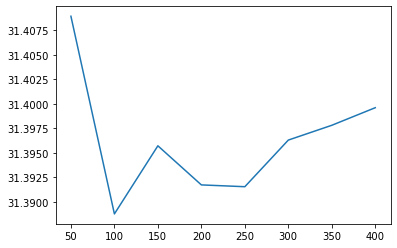

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [43]:
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(X_train1, y_train1)
y_pred = regrRM2.predict(X_test1)


#data_for_2019 = validationData.rename(columns = {'hvac':'Actual'})
#data_for_2019['Predicted'] = y_pred_2019

In [44]:
validationData1 = X_test1.loc[:]
#X_test1
#validationData
#y_pred
#validationData1 = y_test.rename(columns = {'price':'Actual'})
validationData1['Predicted'] = y_pred


In [45]:
validationData1['Actual'] = y_test1


In [46]:
validationData1 = validationData1.drop(columns=['minimum_nights','ng_Brooklyn','ng_Manhattan','ng_Queens','ng_Staten Island','rt_Private room','rt_Shared room'])

In [47]:
x_test1 = X_test1.loc[:]
x_test1.drop

<bound method DataFrame.drop of        minimum_nights  number_of_reviews  ng_Brooklyn  ng_Manhattan  \
44972               1                  0            0             1   
31738              10                  0            0             1   
2579                6                  0            0             1   
1467                3                 15            1             0   
10222               2                 10            1             0   
...               ...                ...          ...           ...   
31844               2                  7            1             0   
42006               1                 12            0             0   
41267               1                  3            1             0   
33225               2                 22            0             0   
14275               1                 63            0             0   

       ng_Queens  ng_Staten Island  rt_Private room  rt_Shared room  
44972          0                 0           

In [48]:
#ser = validationData
#ser.plot(kind='scatter',figsize=(16, 6))

accuracy = regrRM2.score(x_test1,y_test1)
print(accuracy*100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))


47.174022489212966 %
Root Mean Squared Error: 38.906250547297326


In [49]:
y_test1 = y_test1.to_numpy()

In [50]:
y_test1

array([100, 179, 125, ...,  70,  10,  55])

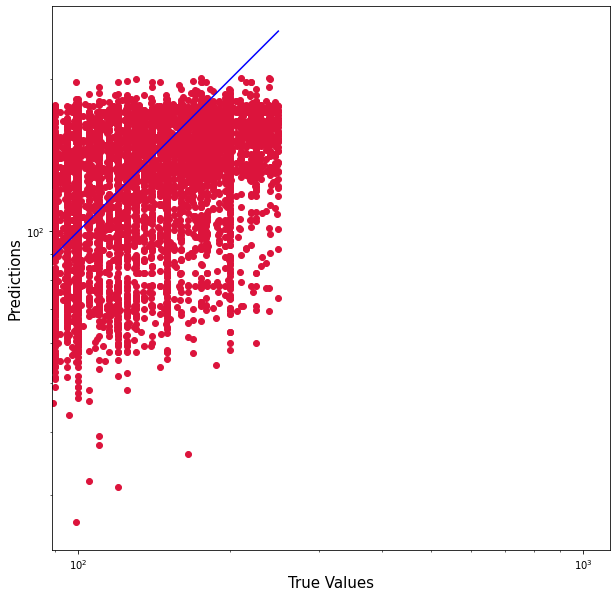

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(y_test1, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test1))
p2 = min(min(y_pred), min(y_test1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [52]:
y = newData.price
newData1 = newData.drop(columns='price')
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,newData1[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(newData1[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [53]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(newData1.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [54]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,12):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 11 models on 1 predictors in 0.04297804832458496 seconds.
Processed 55 models on 2 predictors in 0.42986178398132324 seconds.
Processed 165 models on 3 predictors in 0.900109052658081 seconds.
Processed 330 models on 4 predictors in 2.064967155456543 seconds.
Processed 462 models on 5 predictors in 3.3064968585968018 seconds.
Processed 462 models on 6 predictors in 3.892596960067749 seconds.
Processed 330 models on 7 predictors in 3.0419998168945312 seconds.
Processed 165 models on 8 predictors in 1.6663832664489746 seconds.
Processed 55 models on 9 predictors in 0.6530077457427979 seconds.
Processed 11 models on 10 predictors in 0.14397907257080078 seconds.
Processed 1 models on 11 predictors in 0.018199920654296875 seconds.
Total elapsed time: 16.88557267189026 seconds.


In [55]:
models_best

,RSS,model
1,3.119499e+08,<statsmodels.regression.linear_model.Regressio...
2,1.556390e+08,<statsmodels.regression.linear_model.Regressio...
3,1.177716e+08,<statsmodels.regression.linear_model.Regressio...
4,8.877699e+07,<statsmodels.regression.linear_model.Regressio...
5,8.301610e+07,<statsmodels.regression.linear_model.Regressio...
6,7.841449e+07,<statsmodels.regression.linear_model.Regressio...
7,7.563700e+07,<statsmodels.regression.linear_model.Regressio...
8,7.535788e+07,<statsmodels.regression.linear_model.Regressio...
9,7.501586e+07,<statsmodels.regression.linear_model.Regressio...
10,7.501165e+07,<statsmodels.regression.linear_model.Regressio...


In [68]:
print(models_best.loc[10, "model"].summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                          3.101e+04
Date:                Sat, 01 May 2021   Prob (F-statistic):                        0.00
Time:                        17:53:24   Log-Likelihood:                     -2.1995e+05
No. Observations:               42669   AIC:                                  4.399e+05
Df Residuals:                   42659   BIC:                                  4.400e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [64]:
print(getBest(10)["model"].summary())


Processed 11 models on 10 predictors in 0.24324798583984375 seconds.
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                          3.101e+04
Date:                Sat, 01 May 2021   Prob (F-statistic):                        0.00
Time:                        17:20:48   Log-Likelihood:                     -2.1995e+05
No. Observations:               42669   AIC:                                  4.399e+05
Df Residuals:                   42659   BIC:                                  4.400e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std er

Text(0, 0.5, 'BIC')

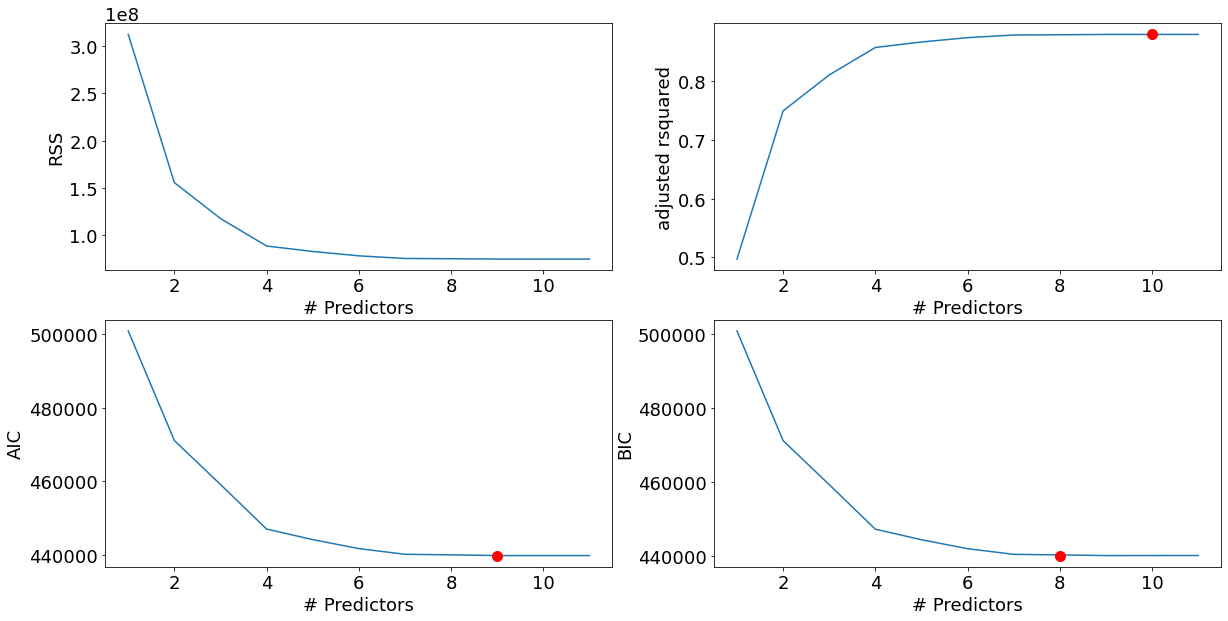

In [58]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[10, "model"].params)

In [69]:
featuresDrop = ['reviews_per_month']
featuresNotDrop = ['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','ng_Brooklyn','ng_Manhattan','ng_Queens','ng_Staten Island','rt_Private room',	'rt_Shared room']
trainingDataNew = newData.drop(columns = featuresDrop) 

In [70]:
X_2= newData.loc[:, newData.columns != 'price']
y_2 = newData["price"]

In [71]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.20, random_state=50)

In [72]:
regrRM3 = RandomForestRegressor(n_estimators=1000, min_samples_split = 10,
 min_samples_leaf = 2,
 max_features = 'auto',
 max_depth=  10,
 bootstrap = True)
regrRM3.fit(X_train2, y_train2)
y_predReg = regrRM3.predict(X_test2)


In [73]:
accuracy = regrRM3.score(X_test2,y_test2)
print(accuracy*100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2,  y_predReg)))


53.24052270796924 %
Root Mean Squared Error: 36.40028284577914


In [74]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [87]:
t1 = time.time()
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 180, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(X_train2, y_train2)
t2 =time.time()

Fitting 3 folds for each of 180 candidates, totalling 540 fits


In [88]:
rf2_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [89]:
rf2_random.score(X_test2,y_test2)

0.5324686680962581

In [90]:
y_predL1= rf2_random.predict(X_test2)
print(np.sqrt(metrics.mean_squared_error(y_test2,y_predL1)))

36.39781345410308


In [93]:

rmsedt = {"Model":["LR","RR", "DT","RFR", "T-RFR"],"RMSE":[38.53025680449589,
38.52996640995658,
38.43661629272327,
37.68939882420686,
36.40028284577914,]}
rmsedf = pd.DataFrame(rmsedt)




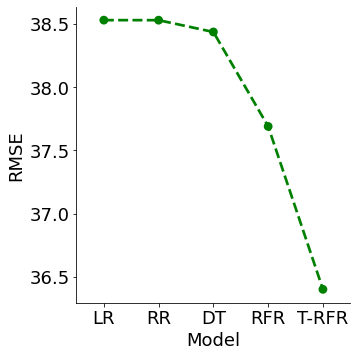

In [92]:
sns.catplot(x="Model", y="RMSE", linestyles=["--"],
            kind="point",  color ="green", data=rmsedf)